In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('Datasets/Iris.csv')
df.drop(columns=['Id'], inplace=True)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


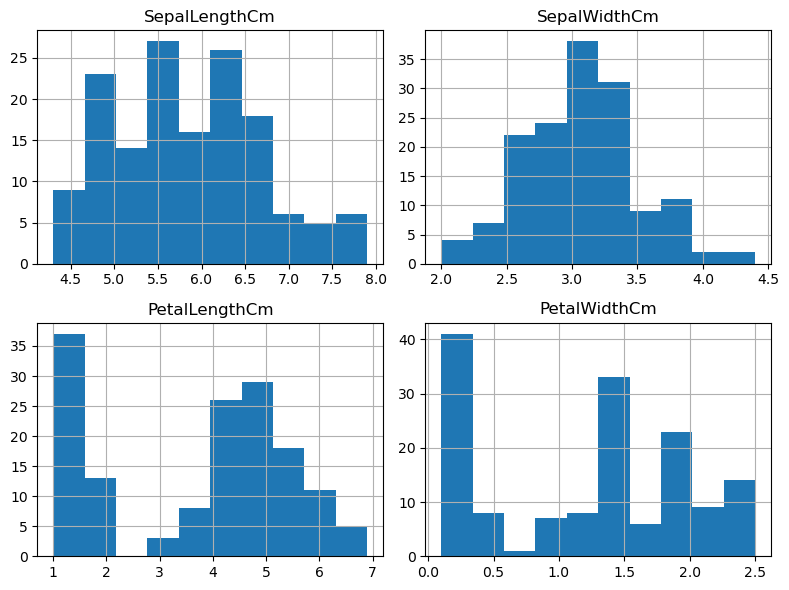

In [8]:
df[df.columns].hist(figsize=(8,6))
plt.tight_layout()
plt.savefig("histogram.png", dpi=300, bbox_inches="tight")
plt.show()


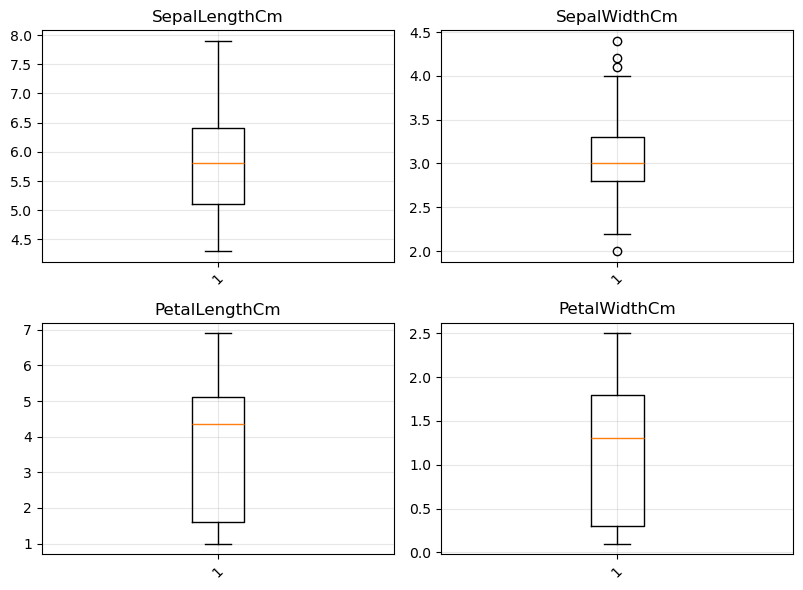

In [9]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(2,2, figsize = (8,6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  axes[i].boxplot(df[col])
  axes[i].set_title(col)
  axes[i].tick_params(axis='x', rotation=45)
  axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("box_plot.png", dpi=300, bbox_inches="tight")
plt.show()

Not much outliers to be concerned about

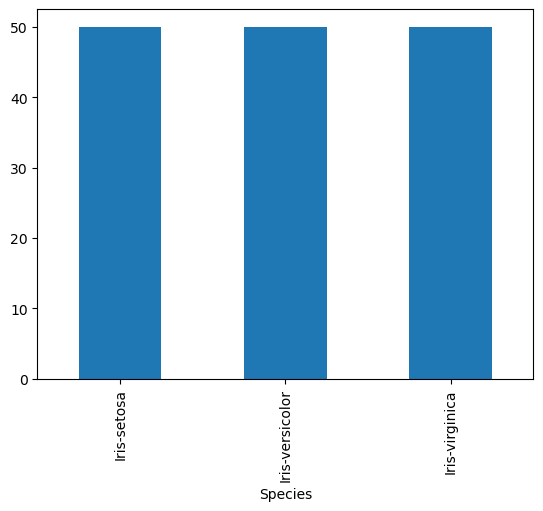

In [10]:
df['Species'].value_counts().plot(kind='bar')
axes[i].set_title("Species")
axes[i].set_xlabel('')
axes[i].set_ylabel('Count')
plt.savefig("bar_plot.png", dpi=300, bbox_inches="tight")

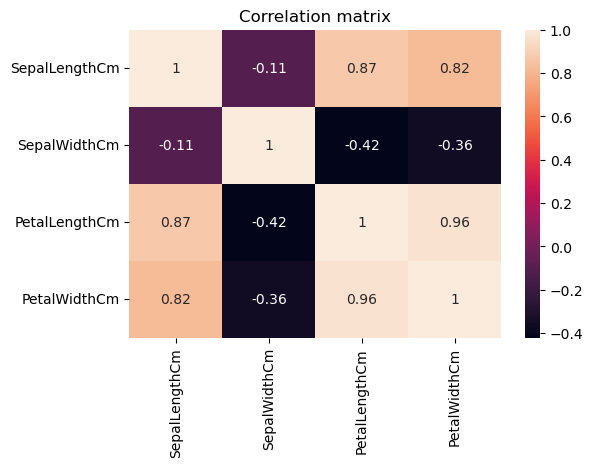

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation matrix")
plt.savefig("correlational_matrix.png", dpi=300, bbox_inches="tight")
plt.show()